In [36]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
print(f"tensor flow version:{tf.__version__}")
print(f'keras version:{tf.keras.__version__}')

tensor flow version:2.16.1
keras version:3.3.3


In [38]:
tf.config.list_physical_devices("CPU")


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [39]:
tf.config.list_physical_devices("GPU")


[]

In [40]:
check_list = ['GPU','CPU']

for device in check_list:
  out = tf.config.list_physical_devices(device)
  if len(out) > 0:
    print(f"{device} is available!")
    print(f"Details >> {out}")
  else:
    print(f"{device} isn't available!")

GPU isn't available!
CPU is available!
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [41]:
mnist=tf.keras.datasets.mnist
(X_train_full,y_train_full),(x_test,y_test)=mnist.load_data()

In [42]:
X_train_full.dtype,X_train_full.shape

(dtype('uint8'), (60000, 28, 28))

In [43]:
x_test.shape

(10000, 28, 28)

In [44]:
len(x_test[1][0])

28

In [45]:
x_valid,x_train=X_train_full[:5000]/255.,X_train_full[5000:]/255.
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

In [46]:
x_test=x_test/255.

In [47]:
len(X_train_full[5000:])

55000

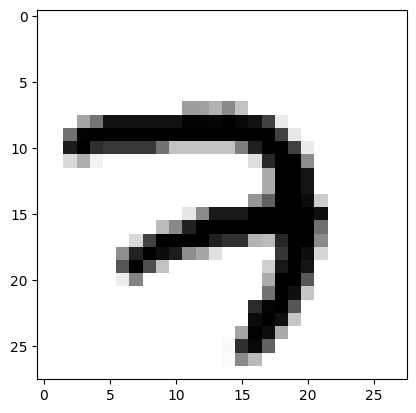

In [48]:
plt.imshow(x_train[0],cmap='binary')

<Axes: >

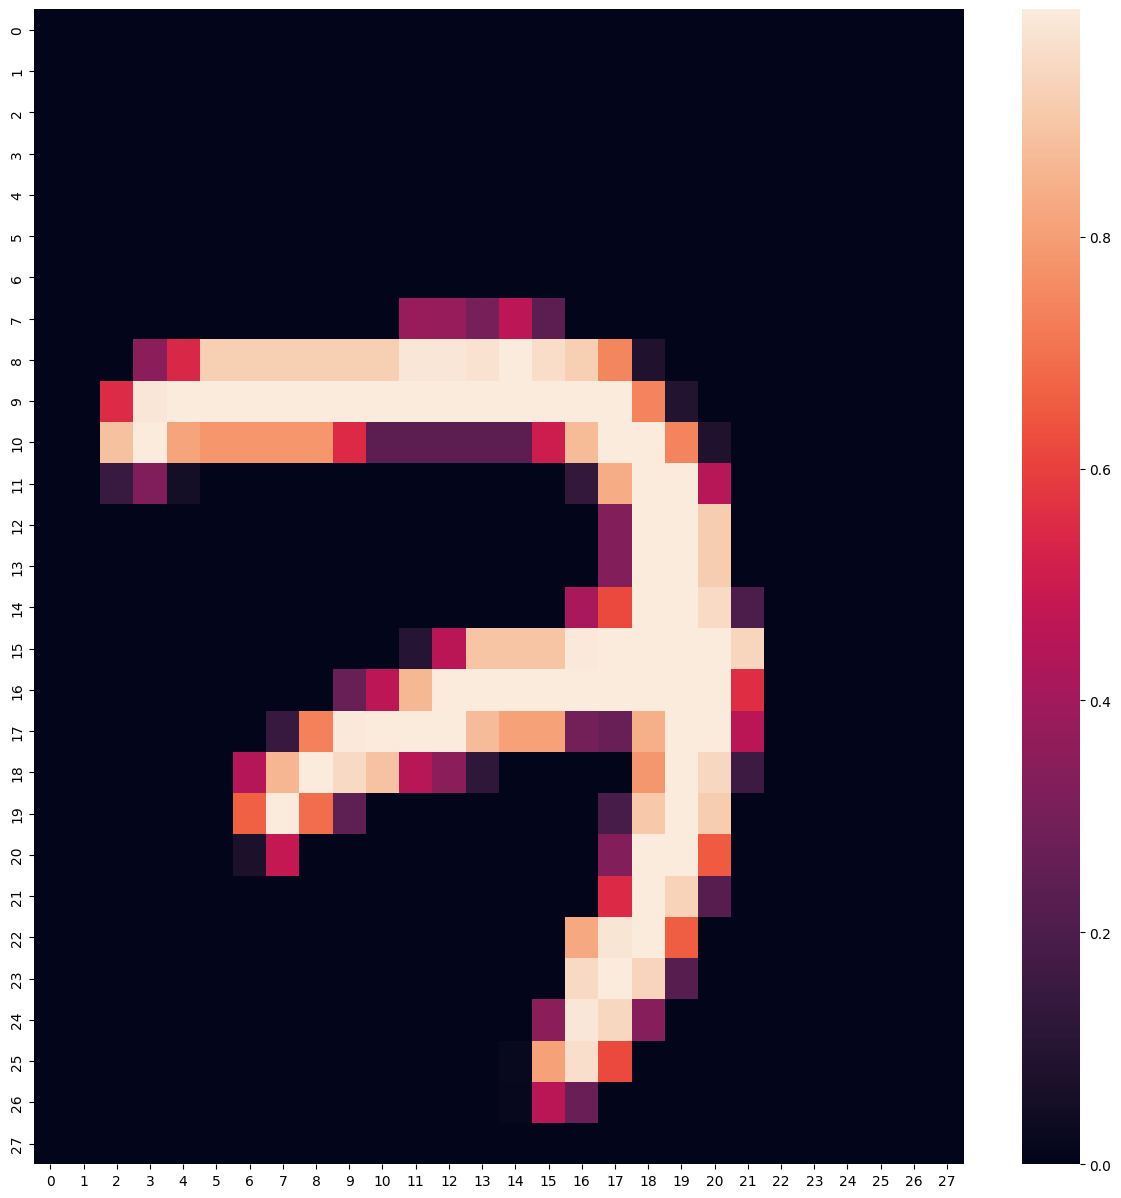

In [49]:
plt.figure(figsize=(15,15))
sns.heatmap(x_train[0],annot=False)

In [50]:
LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28],name="inputlayer"),
        tf.keras.layers.Dense(300,activation="relu",name="hiddenlayer1"),
        tf.keras.layers.Dense(100,activation="relu",name="hiddenlayer2"),
        tf.keras.layers.Dense(10,activation="softmax",name="outputlayer")]
model_clf=tf.keras.models.Sequential(LAYERS)

c:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
model_clf.layers

[<Flatten name=inputlayer, built=True>,
 <Dense name=hiddenlayer1, built=True>,
 <Dense name=hiddenlayer2, built=True>,
 <Dense name=outputlayer, built=True>]

In [52]:
model_clf.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputlayer (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenlayer1 (Dense)            │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenlayer2 (Dense)            │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputlayer (Dense)             │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model=model_clf.layers[1]

In [54]:
model.name

'hiddenlayer1'

In [55]:
model.get_weights()[0]

array([[-0.05828673,  0.06466872,  0.05830093, ...,  0.03942424,
        -0.00476725, -0.02770511],
       [ 0.0225385 , -0.04414767,  0.01302037, ..., -0.00811101,
         0.00279898, -0.01008039],
       [-0.00143306,  0.05856878, -0.05746582, ...,  0.05416049,
        -0.04328175,  0.01977053],
       ...,
       [ 0.00088457,  0.04175929,  0.0380944 , ..., -0.01840134,
        -0.01980555,  0.05708921],
       [ 0.04521111,  0.0359895 ,  0.04311694, ..., -0.06394734,
        -0.00922204, -0.01657877],
       [-0.02844965, -0.05821612,  0.05509621, ..., -0.02194389,
         0.01459114, -0.04917905]], dtype=float32)

In [56]:
LOSS_FUNCTION="sparse_categorical_crossentropy"
OPTIMIZER="SGD"
METRICS=["accuracy"]
model_clf.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER,metrics=METRICS)

In [57]:
#training
EPOCHS=30
VALIDATION_SET=(x_valid,y_valid)
history=model_clf.fit(x_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET,batch_size=40)

Epoch 1/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7044 - loss: 1.1340 - val_accuracy: 0.9086 - val_loss: 0.3350
Epoch 2/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9050 - loss: 0.3338 - val_accuracy: 0.9276 - val_loss: 0.2685
Epoch 3/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9218 - loss: 0.2748 - val_accuracy: 0.9372 - val_loss: 0.2286
Epoch 4/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9338 - loss: 0.2379 - val_accuracy: 0.9420 - val_loss: 0.2056
Epoch 5/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9417 - loss: 0.2047 - val_accuracy: 0.9482 - val_loss: 0.1807
Epoch 6/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9470 - loss: 0.1852 - val_accuracy: 0.9544 - val_loss: 0.1662
Epoch 7/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9525 - loss: 0.1634 - val_accuracy: 0.9574 - val_loss: 0.1516
Epoch 8/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9565 - loss: 0.1578 - 

In [58]:
df=pd.DataFrame(history.history)

In [59]:
df

,accuracy,loss,val_accuracy,val_loss
0,0.828200,0.683862,0.9086,0.335011
1,0.909709,0.316554,0.9276,0.268533
2,0.925455,0.264264,0.9372,0.228602
3,0.935418,0.229875,0.9420,0.205627
4,0.941600,0.204672,0.9482,0.180701
5,0.947636,0.183454,0.9544,0.166249
6,0.952255,0.166118,0.9574,0.151635
7,0.957273,0.151518,0.9606,0.140317
8,0.961036,0.138900,0.9626,0.132002
9,0.963455,0.127697,0.9642,0.123459


<Axes: >

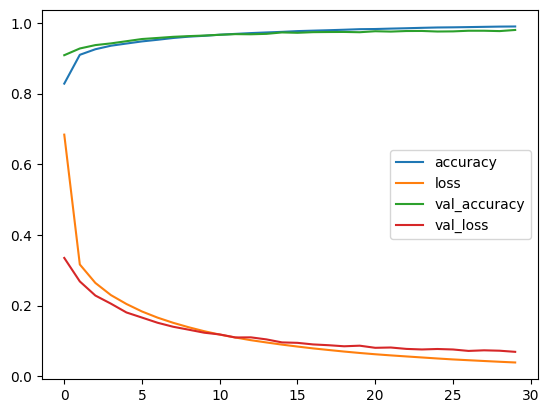

In [60]:
df.plot()

In [61]:
model_clf.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9726 - loss: 0.0897


[0.07541715353727341, 0.9778000116348267]

In [71]:
x_new=x_test[4:6]

In [72]:
x_new

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [73]:
actual=y_test[4:6]

In [74]:
actual

array([4, 1], dtype=uint8)

In [75]:
y_prob=model_clf.predict(x_new)
y_prob.round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.997, 0.   , 0.   , 0.   , 0.   ,
        0.003],
       [0.   , 0.997, 0.   , 0.   , 0.   , 0.   , 0.   , 0.003, 0.   ,
        0.   ]], dtype=float32)

In [76]:
y_prob

array([[1.0875778e-05, 2.4600809e-07, 1.5553002e-05, 1.4644884e-07,
        9.9708003e-01, 6.9214002e-07, 2.4784604e-05, 2.1908317e-04,
        3.4696752e-06, 2.6451317e-03],
       [1.2473449e-06, 9.9678218e-01, 1.2771786e-05, 9.1890106e-06,
        1.3244060e-04, 9.3176183e-08, 4.4099361e-06, 3.0185606e-03,
        3.4763532e-05, 4.2696447e-06]], dtype=float32)

In [77]:
y_pred=np.argmax(y_prob,axis=-1)

In [78]:
y_pred

array([4, 1], dtype=int64)

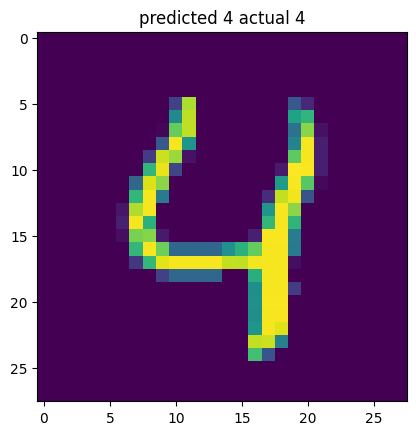

In [79]:

plt.imshow(x_new[0])
plt.title(f"predicted {y_pred[0]} actual {actual[0]}")
plt.show()
    